## Image Denoising

In [4]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import math

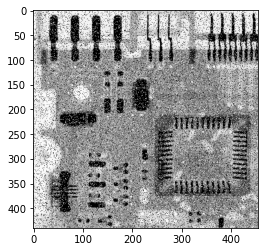

In [2]:
img = skimage.io.imread('./images/circuitboard.tif')
plt.imshow(img,cmap='gray')

In [3]:
img.shape

(440, 455)

In [7]:
P=5 #filter size
mean_filter = 1/25*np.ones((P,P))

In [8]:
M=img.shape[0]
N=img.shape[1]
filtered_1 = np.zeros((M,N))
filtered_2 = np.zeros((M,N))

In [10]:
for i in range(int(P/2),M-int(P/2)):
    for j in range(int(P/2),N-int(P/2)):
        sum1 = 0
        arr = []
        for k in range(0,P):
            for l in range(0,P):
                sum1 = sum1+mean_filter[k][l]*imgC
                arr.append(img[i+k-int(P/2)][j+l-int(P/2)])
        filtered_1[i][j]=sum1
        arr.sort()
        filtered_2[i][j]=arr[int(len(arr)/2)]
       

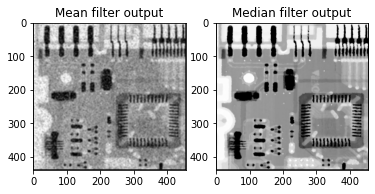

In [15]:
plt.subplot(1,2,1)
plt.title("Mean filter output")
plt.imshow(filtered_1,cmap='gray')
plt.subplot(1,2,2)
plt.title("Median filter output")
plt.imshow(filtered_2,cmap='gray')

## Bilateral Filter

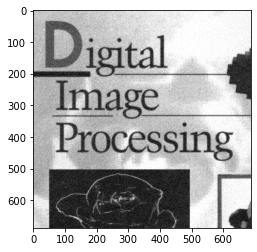

In [13]:
img = skimage.io.imread('./images/noisybook.png')
plt.imshow(img,cmap='gray')
plt.show()

In [6]:
img.shape

(688, 688)

In [7]:
M=img.shape[0]
N=img.shape[1]
P = 7

In [8]:
# Gaussian filter
D=50
H=50
G=np.zeros((P,P))
for i in range(0,P):
    for j in range(0,P):
        G[i][j]=math.exp(-(i**2+j**2)/(2*D**2))

In [9]:
J = np.zeros((M,N))

In [10]:
#Bilateral Filter
for i in range(int(P/2),M-int(P/2)):
    for j in range(int(P/2),N-int(P/2)):
        sum1=0
        d=0
        for k in range(0,P):
            for l in range(0,P):
                a=np.round(math.exp(-(img[i][j]-img[i+k-int(P/2)][j+l-int(P/2)])**2/(2*H**2)),5)
                sum1=sum1+G[k][l]*img[i+k-int(P/2)][j+l-int(P/2)]* a
                d = d+G[k][l]*a
        J[i][j]=sum1/d

C:\Users\HP\AppData\Local\Temp\ipykernel_7384\1797722451.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  a=np.round(math.exp(-(img[i][j]-img[i+k-int(P/2)][j+l-int(P/2)])**2/(2*H**2)),5)


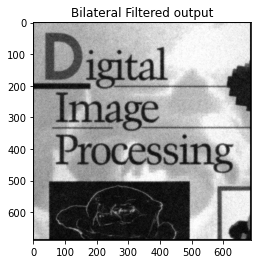

In [14]:
plt.imshow(J,cmap='gray')
plt.title("Bilateral Filtered output")
plt.show()

In [15]:
#Gaussian Filter
J_G= np.zeros((M,N))
for i in range(int(P/2),M-int(P/2)):
    for j in range(int(P/2),N-int(P/2)):
        sum1=0
        d=0
        for k in range(0,P):
            for l in range(0,P):
                sum1=sum1+G[k][l]*img[i+k-int(P/2)][j+l-int(P/2)]
                d = d+G[k][l]
        J_G[i][j]=sum1/d

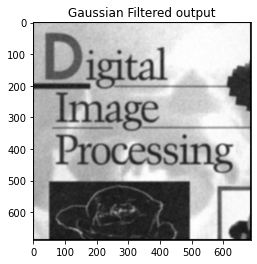

In [16]:
plt.imshow(J_G,cmap='gray')
plt.title("Gaussian Filtered output")
plt.show()

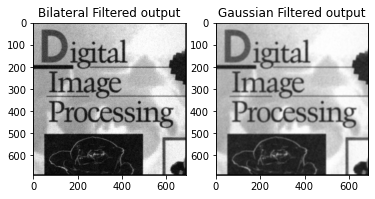

In [17]:
plt.subplot(1,2,1)
plt.imshow(J,cmap='gray')
plt.title("Bilateral Filtered output")
plt.subplot(1,2,2)
plt.imshow(J_G,cmap='gray')
plt.title("Gaussian Filtered output")
plt.show()

Bilateral filtered output is more sharp and better than gaussian filtered image